In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import fetch_california_housing
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

In [ ]:
data=fetch_california_housing()
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

In [ ]:
df.dropna(inplace=True)
df.columns
df['Target']=data.target
df

In [ ]:
df.info()

In [25]:
y = df.iloc[:,6].values

In [26]:
df.drop('Target',axis=1,inplace=True)
X = df.iloc[:,:].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
#opt = tf.optimizers.Adam(learning_rate=0.0001,epsilon=1e-09,decay=0.0)
model.compile(optimizer='adam', loss='mse')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=700)

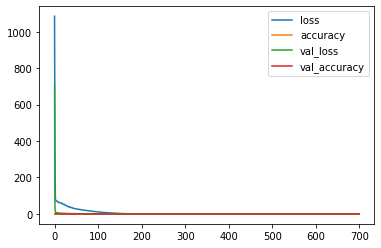

In [72]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)

In [74]:
from sklearn.metrics import r2_score

r2_score(y_test, predictions)*100

97.46089957427455